In [1]:
from scipy import optimize
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
import pandas as pd

## **1)** Movimiento de proyectiles en precensia del viento

$$x=(u\cos{\alpha})t+\frac{1}{b}(v_0\cos{\theta_0}-u\cos{\alpha})(1-exp(-bt))$$

$$y=\frac{1}{b}(\frac{g}{b}+v_0\sin{\theta}_0-u\sin{\alpha})(1-exp(-bt))-(\frac{g}{b}-u\sin{\alpha})t$$

### a)

In [4]:
v_0 = 60 
alpha = np.pi 
theta_0 = np.deg2rad(45) 
u = v_0/2             
b = 0.05             
g = 9.8                
Params = (u, alpha, b, v_0, theta_0, g)

### b)

In [15]:
def x(t,u,alpha,b,v_0,theta_0,g):
  t1=u*np.cos(alpha)*t
  t2=1/b*(v_0*np.cos(theta_0)-u*np.cos(alpha))
  t3=1-np.exp(-b*t)
  return t1+t2*t3

def y(t,u,alpha,b,v_0,theta_0,g):
  t1=1/b*(g/b+v_0*np.sin(theta_0)-u*np.sin(alpha))
  t2=1-np.exp(-b*t)
  t3=(g/b-u*np.sin(alpha))*t
  return (t1*t2-t3)

### c)

In [16]:
t1=np.linspace(0,10,1000)

posx=x(t1,*Params)
posy=y(t1,*Params)

dic_pos={'x':posx,'y':posy}

### d)

In [17]:
pos=pd.DataFrame(dic_pos)

pos

,x,y
0,0.000000,0.000000
1,0.424507,0.424092
2,0.848652,0.846989
3,1.272434,1.268694
4,1.695854,1.689205
...,...,...
995,269.391938,-81.678639
996,269.532136,-82.190486
997,269.672115,-82.703059
998,269.811873,-83.216357


### e)

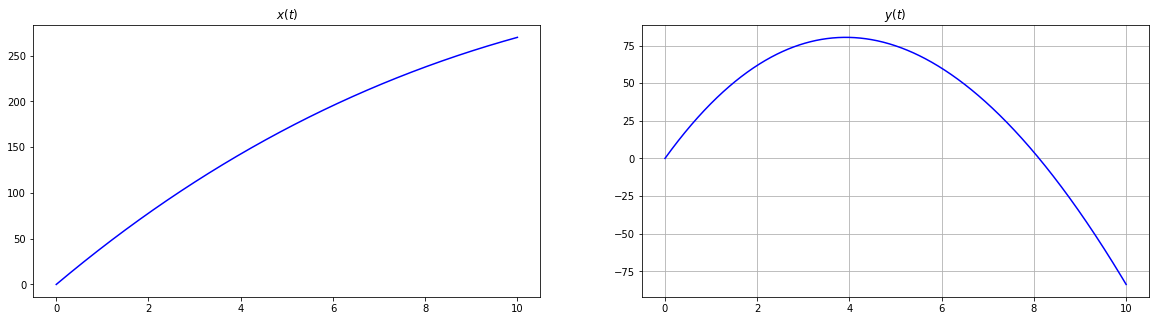

In [60]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,5)

axs[0].plot(t1,pos.x,'b')
axs[0].set_title('$x(t)$')

axs[1].plot(t1,pos.y,'b')
axs[1].set_title('$y(t)$')
plt.grid()

plt.show()

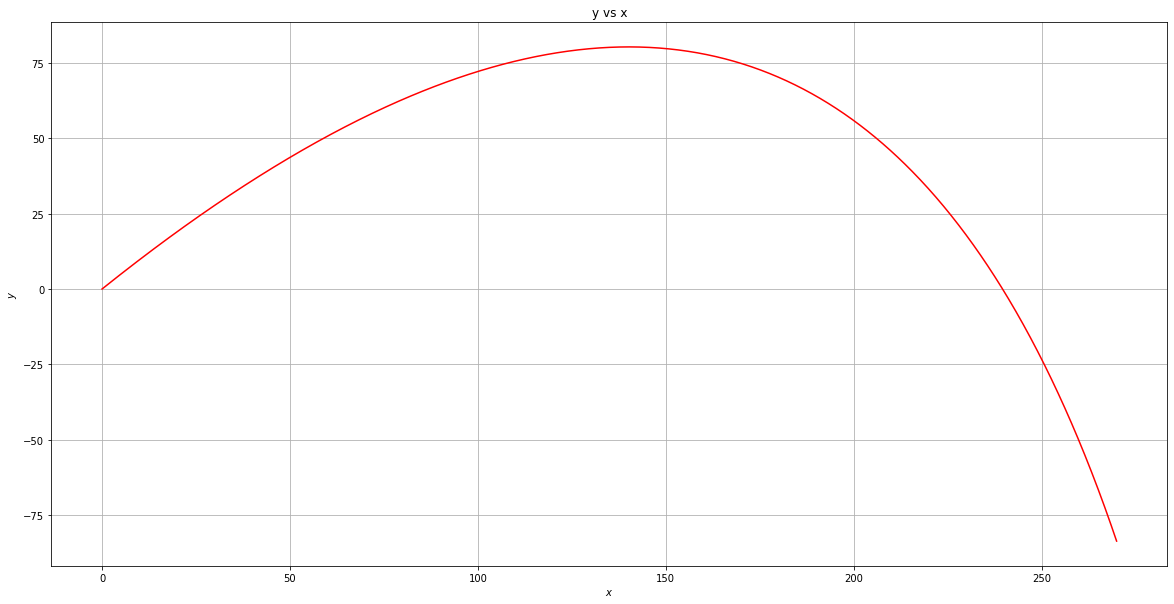

In [59]:
plt.figure(figsize=(20,10))
plt.plot(pos.x,posy,'r')
plt.title('y vs x')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

### f)

In [41]:
tv=optimize.newton(y, 8, args=Params)
print('El tiempo de vuelo es de :', tv, 's')

El tiempo de vuelo es de : 8.111627022095583 s


In [40]:
am=x(tv,*Params)
print('El alcance máximo es de:', am,'m')

El alcance máximo es de: 239.6061494552073 m


### g)

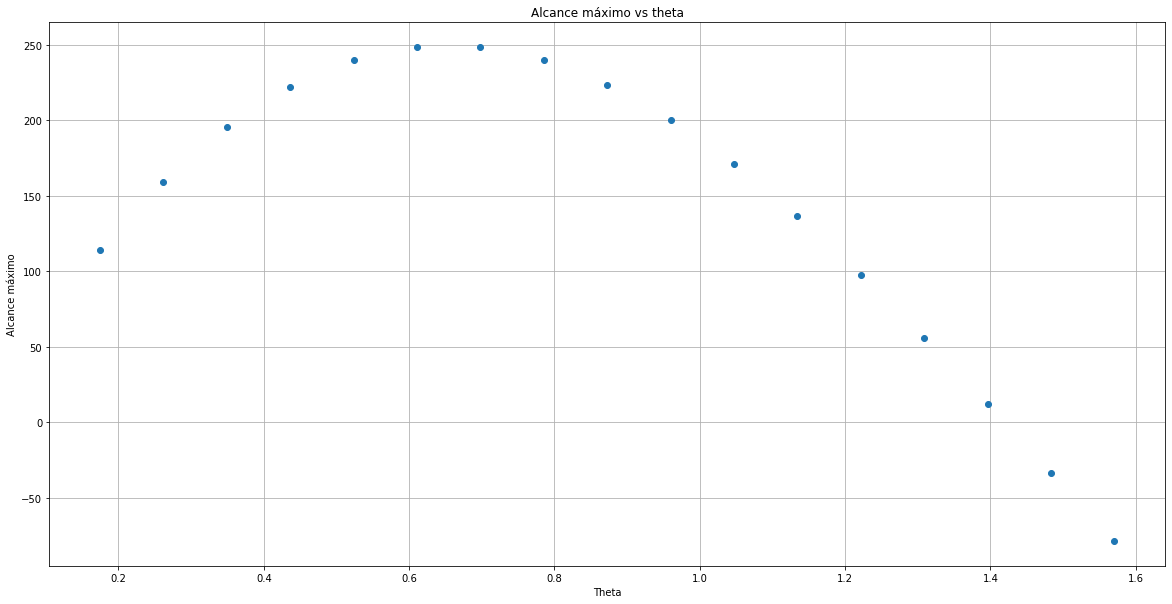

In [61]:
ang=np.arange(10,91,5)
ar=np.deg2rad(ang)

amax=np.zeros(len(ar))

for v in range(len(amax)):
  Params=(u, alpha, b, v_0, ar[v], g)
  tv=optimize.newton(y, 8, args=Params)
  am=x(tv,*Params)
  amax[v]=am

plt.figure(figsize=(20,10))
plt.title('Alcance máximo vs theta')
plt.plot(ar,amax,'o')
plt.xlabel('Theta')
plt.ylabel('Alcance máximo')
plt.grid()
plt.show()

### h)

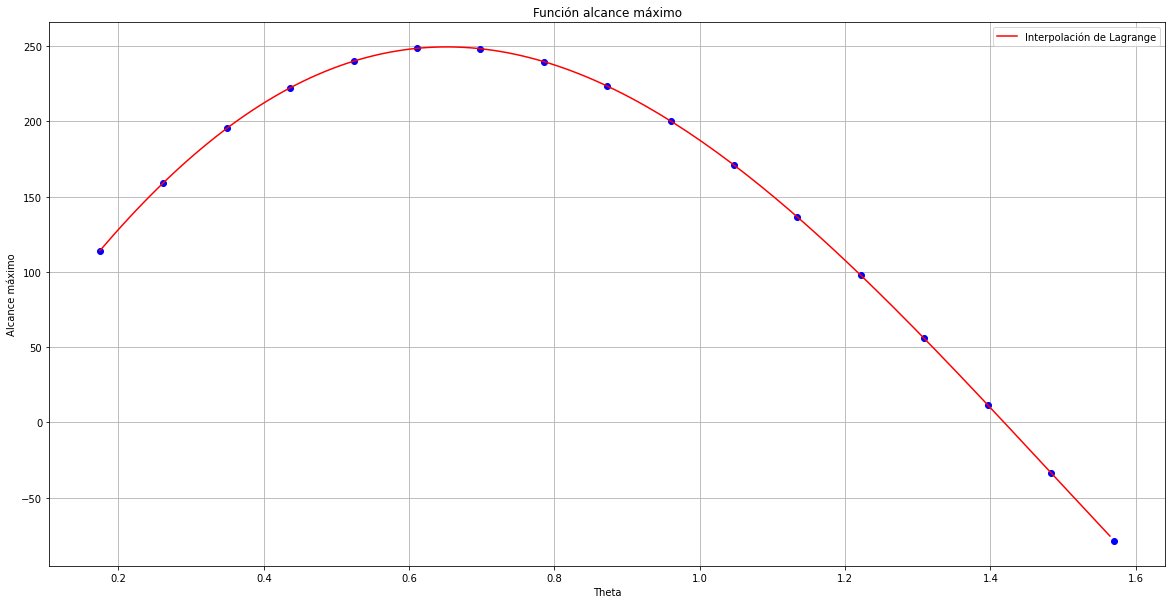

In [65]:
aml=interpolate.lagrange(ar,amax)
la=np.arange(ar[0],ar[-1],0.01)

plt.figure(figsize=(20,10))
plt.title('Función alcance máximo')
plt.plot(ar,amax,'ob')
plt.plot(la,aml(la),'r',label='Interpolación de Lagrange')
plt.xlabel('Theta')
plt.ylabel('Alcance máximo')
plt.grid()
plt.legend()
plt.show()

## **2)** Lagrange

$$f(x)=\frac{1}{1+25x^2}$$

In [67]:
f= lambda x: 1/(1+25*x**2)

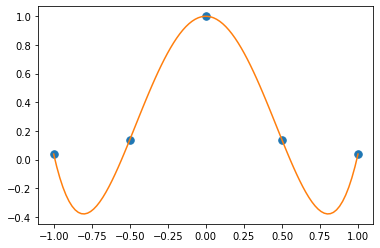

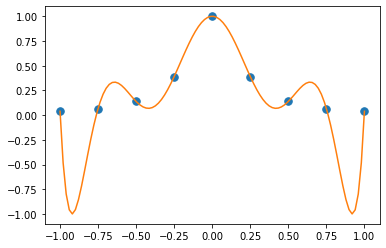

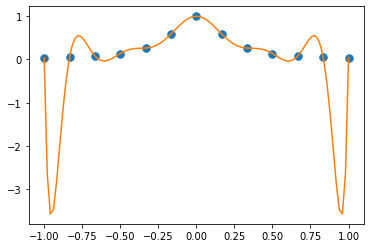

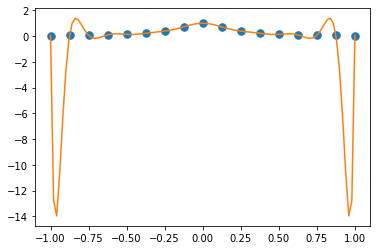

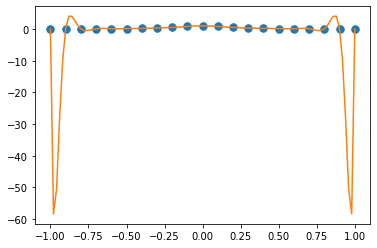

In [68]:
n=[4,8,12,16,20]
x1=np.linspace(-1,1,100)

for i in n:
  x=np.linspace(-1,1,i+1)
  y=f(x)

  l=interpolate.lagrange(x,y)

  plt.figure()
  plt.plot(x,y,'.',markersize=15)
  plt.plot(x1,l(x1))
  plt.show()

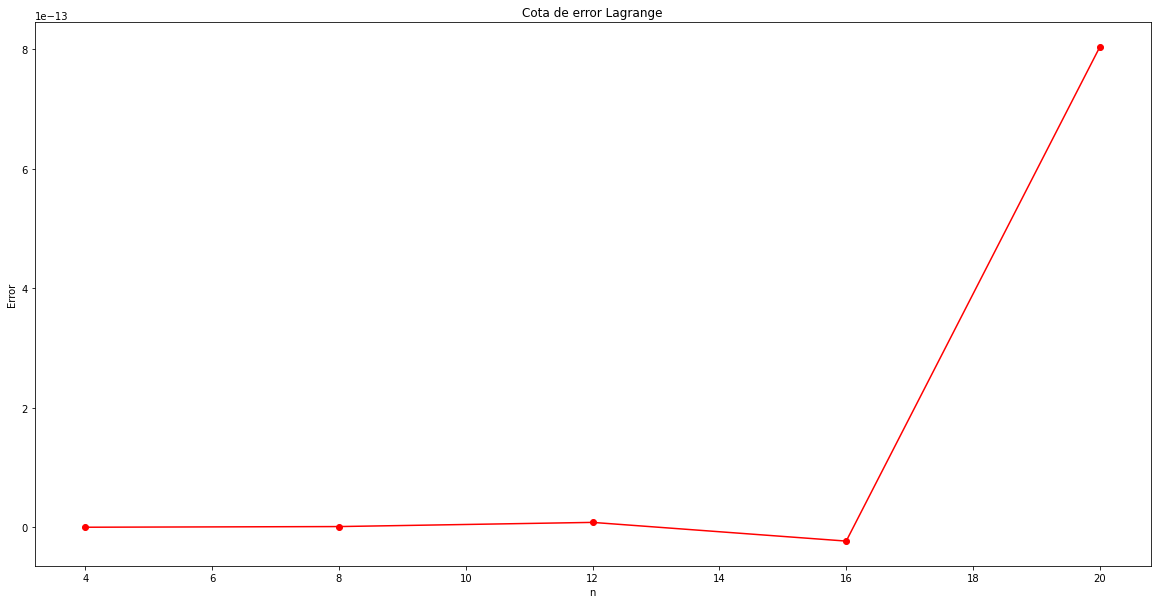

In [69]:
e1=[]
for i in n:
  x2=np.linspace(-1,1,i+1)
  y2=f(x2)
  l2=interpolate.lagrange(x2,y2)
  e1.append(f(0.5)-l2(0.5))

plt.figure(figsize=(20,10))
plt.title('Cota de error Lagrange')
plt.plot(n,e1,'o-r')
plt.xlabel('n')
plt.ylabel('Error')
plt.show()

## **3)** Hermite

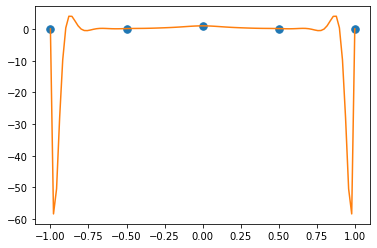

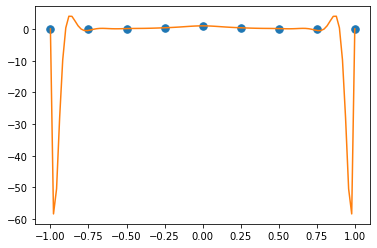

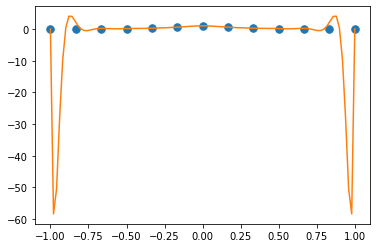

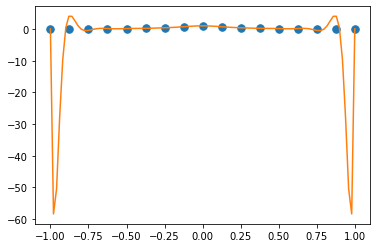

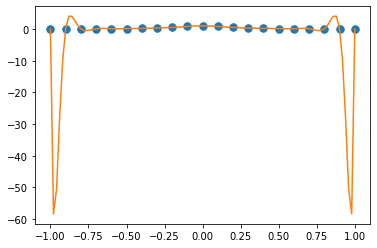

In [ ]:
for i in range(len(n)):
  x=np.linspace(-1,1,n[i]+1)
  y=f(x)

  h=np.polynomial.hermite.Hermite.fit(x,y,i)

  plt.figure()
  plt.plot(x,y,'.',markersize=15)
  plt.plot(x1,l(x1))
  plt.show()

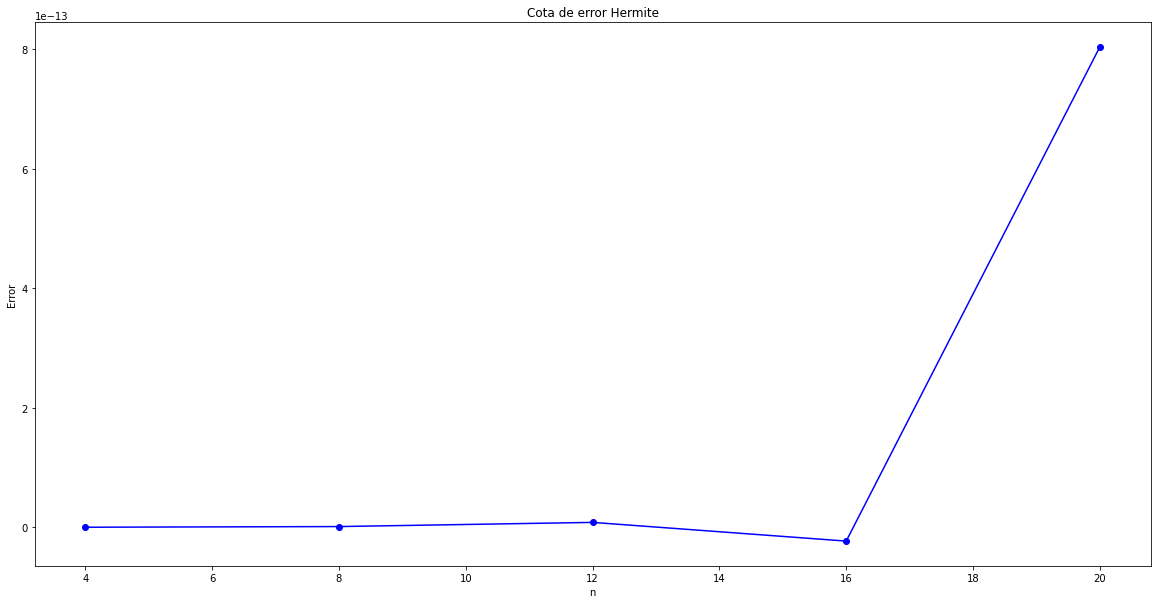

In [70]:
e2=[]
for z in n:
  x3=np.linspace(-1,1,z+1)
  y3=f(x3)
  l3=interpolate.lagrange(x3,y3)
  e2.append(f(0.5)-l3(0.5))

plt.figure(figsize=(20,10))
plt.title('Cota de error Hermite')
plt.plot(n,e2,'o-b')
plt.xlabel('n')
plt.ylabel('Error')
plt.show()

## **4)**

In [71]:
x=[0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3]
y=[1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9, 0.7,0.6,0.5,0.4,0.25]

t=pd.DataFrame({'x':x,'y':y})

x5=np.arange(min(t.x),max(t.x),0.01)

t

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


In [73]:
Pl=interpolate.lagrange(t.x,t.y)
Pc=interpolate.CubicSpline(t.x,t.y)

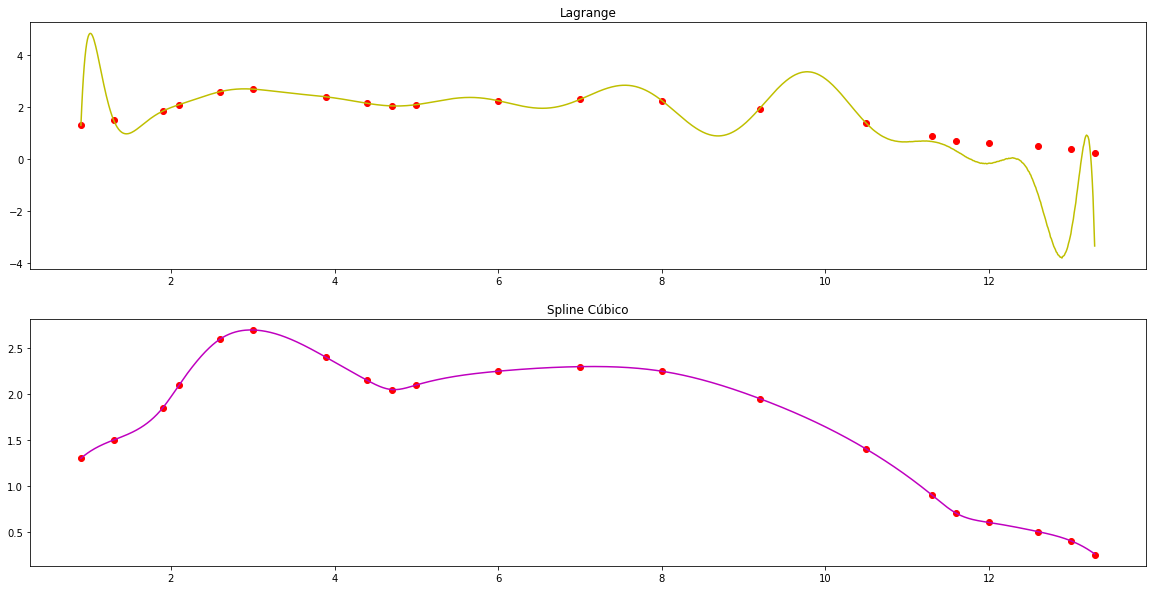

In [74]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(20,10)

axs[0].plot(t.x,t.y,'or')
axs[0].plot(x5,Pl(x5),'y')
axs[0].set_title('Lagrange')

axs[1].plot(t.x,t.y,'or')
axs[1].plot(x5,Pc(x5),'m')
axs[1].set_title('Spline Cúbico')

plt.show()

En la gráfica se puede observar que la interpolación de LAgrange presenta oscilaciones, lo que evita que pueda formarse la imagen que buscamos; esto se debe a que el método de Lagrange se basa en polinomios de grado superior que presentan este comportaiento generalmente. El método de spline cúibico no presenta este comportamiento porque genera otro tipo de funciones que pueden ajustarse mejor a una serie de punntos sin tener que ser polinomios.